In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
# 导入轮廓系数指标
from sklearn.metrics import silhouette_score
# KMeans模块
from sklearn.cluster import KMeans
# 数据预处理库
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  

In [2]:
raw_data = pd.read_table('D:/Code/Evaluation And Optimization Strategies Of Corporate Advertising Effects/Data/ad_performance.txt', delimiter='\t')

In [3]:
# 查看基本状态
print('{:*^60}'.format('Data overview:'))
# 打印输出前2条数据
print(raw_data.head(2))  
print('{:*^60}'.format('Data dtypes:'))
# 打印数据类型分布
print(pd.DataFrame(raw_data.dtypes).T)  
print('{:*^60}'.format('Data DESC:'))
# 打印原始数据基本描述性信息
print(raw_data.describe().round(2).T)  

***********************Data overview:***********************
   渠道代号    日均UV   平均注册率   平均搜索量    访问深度  平均停留时间   订单转化率  投放总时间 素材类型    广告类型  \
0  A203    3.69  0.0071  0.0214  2.3071  419.77  0.0258     20  jpg  banner   
1  A387  178.70  0.0040  0.0324  2.0489  157.94  0.0030     19  jpg  banner   

  合作方式    广告尺寸 广告卖点  
0  roi  140*40   打折  
1  cpc  140*40   满减  
************************Data dtypes:************************
     渠道代号     日均UV    平均注册率    平均搜索量     访问深度   平均停留时间    订单转化率  投放总时间  \
0  object  float64  float64  float64  float64  float64  float64  int64   

     素材类型    广告类型    合作方式    广告尺寸    广告卖点  
0  object  object  object  object  object  
*************************Data DESC:*************************
        count    mean      std   min     25%     50%     75%       max
日均UV    889.0  540.85  1634.41  0.06    6.18  114.18  466.87  25294.77
平均注册率   889.0    0.00     0.00  0.00    0.00    0.00    0.00      0.04
平均搜索量   889.0    0.03     0.11  0.00    0.00    0.00    0.01   

In [5]:
# 缺失值审查
# 查看每一列是否具有缺失值
na_cols = raw_data.isnull().any(axis=0)  
print('{:*^60}'.format('NA Cols:'))
# 查看具有缺失值的列
print(na_cols[na_cols==True])  
# 查看具有缺失值的行总记录数
print('Total number of NA lines is: {0}'.format(raw_data.isnull().any(axis=1).sum()))  

**************************NA Cols:**************************
平均停留时间    True
dtype: bool
Total number of NA lines is: 2


In [9]:
# 相关性分析
print('{:*^60}'.format('Correlation analysis:'))
# 打印原始数据相关性信息
print(raw_data.corr().round(2).T)  

*******************Correlation analysis:********************
        日均UV  平均注册率  平均搜索量  访问深度  平均停留时间  订单转化率  投放总时间
日均UV    1.00  -0.05  -0.07 -0.02    0.04  -0.05  -0.04
平均注册率  -0.05   1.00   0.24  0.11    0.22   0.32  -0.01
平均搜索量  -0.07   0.24   1.00  0.06    0.17   0.13  -0.03
访问深度   -0.02   0.11   0.06  1.00    0.72   0.16   0.06
平均停留时间  0.04   0.22   0.17  0.72    1.00   0.25   0.05
订单转化率  -0.05   0.32   0.13  0.16    0.25   1.00  -0.00
投放总时间  -0.04  -0.01  -0.03  0.06    0.05  -0.00   1.00


In [10]:
# 删除平均平均停留时间列
raw_data2 = raw_data.drop(['平均停留时间'], axis=1)

In [13]:
print(raw_data2.head())

   渠道代号    日均UV   平均注册率   平均搜索量    访问深度   订单转化率  投放总时间 素材类型    广告类型 合作方式  \
0  A203    3.69  0.0071  0.0214  2.3071  0.0258     20  jpg  banner  roi   
1  A387  178.70  0.0040  0.0324  2.0489  0.0030     19  jpg  banner  cpc   
2  A388   91.77  0.0022  0.0530  1.8771  0.0026      4  jpg  banner  cpc   
3  A389    1.09  0.0074  0.3382  4.2426  0.0153     10  jpg  banner  cpc   
4  A390    3.37  0.0028  0.1740  2.1934  0.0007     30  jpg  banner  cpc   

     广告尺寸 广告卖点  
0  140*40   打折  
1  140*40   满减  
2  140*40   满减  
3  140*40   满减  
4  140*40   满减  


In [14]:
# 将分类数据转换为标志变量
cols = ['素材类型','广告类型','合作方式','广告尺寸','广告卖点']
ohe_matrix = pd.get_dummies(raw_data2[cols])
print(ohe_matrix[:2])

   素材类型_gif  素材类型_jpg  素材类型_sp  素材类型_swf  广告类型_banner  广告类型_tips  广告类型_不确定  \
0         0         1        0         0            1          0         0   
1         0         1        0         0            1          0         0   

   广告类型_暂停  广告类型_横幅  合作方式_cpc   ...     广告尺寸_480*360  广告尺寸_600*90  \
0        0        0         0   ...                0            0   
1        0        0         1   ...                0            0   

   广告尺寸_900*120  广告尺寸_960*126  广告卖点_打折  广告卖点_满减  广告卖点_满赠  广告卖点_满返  广告卖点_直降  \
0             0             0        1        0        0        0        0   
1             0             0        0        1        0        0        0   

   广告卖点_秒杀  
0        0  
1        0  

[2 rows x 27 columns]


In [15]:
# 数据标准化
# 获得要转换的矩阵
sacle_matrix = raw_data2.iloc[:, 1:7]
# 建立MinMaxScaler模型对象
model_scaler = MinMaxScaler()
# MinMaxScaler标准化处理
data_scaled = model_scaler.fit_transform(sacle_matrix)  
print(data_scaled.round(2))

[[0.   0.18 0.02 0.01 0.12 0.66]
 [0.01 0.1  0.03 0.01 0.01 0.62]
 [0.   0.06 0.05 0.01 0.01 0.1 ]
 ...
 [0.01 0.01 0.   0.   0.   0.72]
 [0.05 0.   0.   0.   0.   0.31]
 [0.   0.   0.   0.53 0.   0.62]]


In [16]:
# 合并所有维度
X = np.hstack((data_scaled, ohe_matrix))

In [17]:
# 通过平均轮廓系数检验得到最佳KMeans聚类模型
score_list = list()  # 用来存储每个K下模型的平局轮廓系数
silhouette_int = -1  # 初始化的平均轮廓系数阀值
for n_clusters in range(2, 5):  # 遍历从2到5几个有限组
    model_kmeans = KMeans(n_clusters=n_clusters)  # 建立聚类模型对象
    labels_tmp = model_kmeans.fit_predict(X)  # 训练聚类模型
    silhouette_tmp = silhouette_score(X, labels_tmp)  # 得到每个K下的平均轮廓系数
    if silhouette_tmp > silhouette_int:  # 如果平均轮廓系数更高
        best_k = n_clusters  # 保存K将最好的K存储下来
        silhouette_int = silhouette_tmp  # 保存平均轮廓得分
        best_kmeans = model_kmeans  # 保存模型实例对象
        cluster_labels_k = labels_tmp  # 保存聚类标签
    score_list.append([n_clusters, silhouette_tmp])  # 将每次K及其得分追加到列表
print('{:*^60}'.format('K value and silhouette summary:'))
print(np.array(score_list))  # 打印输出所有K下的详细得分
print('Best K is:{0} with average silhouette of {1}'.format(best_k, silhouette_int))

**************K value and silhouette summary:***************
[[2.         0.38655493]
 [3.         0.45757883]
 [4.         0.50209812]]
Best K is:4 with average silhouette of 0.5020981194788052


In [19]:
# part1 将原始数据与聚类标签整合
# 获得训练集下的标签信息
cluster_labels = pd.DataFrame(cluster_labels_k, columns=['clusters'])
# 将原始处理过的数据跟聚类标签整合
merge_data = pd.concat((raw_data2, cluster_labels), axis=1)  

In [20]:
# part2 计算每个聚类类别下的样本量和样本占比
# 计算每个聚类类别的样本量
clustering_count = pd.DataFrame(merge_data['渠道代号'].groupby(merge_data['clusters']).
                                count()).T.rename({'渠道代号': 'counts'})  
# 计算每个聚类类别的样本量占比
clustering_ratio = (clustering_count / len(merge_data)).round(2).rename({'counts': 'percentage'})  

In [21]:
# part3 计算各个聚类类别内部最显著特征值
cluster_features = []  # 空列表，用于存储最终合并后的所有特征信息
for line in range(best_k):  # 读取每个类索引
    label_data = merge_data[merge_data['clusters'] == line]  # 获得特定类的数据

    part1_data = label_data.iloc[:, 1:7]  # 获得数值型数据特征
    part1_desc = part1_data.describe().round(3)  # 得到数值型特征的描述性统计信息
    merge_data1 = part1_desc.iloc[2, :]  # 得到数值型特征的均值

    part2_data = label_data.iloc[:, 7:-1]  # 获得字符串型数据特征
    part2_desc = part2_data.describe(include='all')  # 获得字符串型数据特征的描述性统计信息
    merge_data2 = part2_desc.iloc[2, :]  # 获得字符串型数据特征的最频繁值

    merge_line = pd.concat((merge_data1, merge_data2), axis=0)  # 将数值型和字符串型典型特征沿行合并
    cluster_features.append(merge_line)  # 将每个类别下的数据特征追加到列表

In [22]:
# part4 输出完整的类别特征信息
# 将列表转化为矩阵
cluster_pd = pd.DataFrame(cluster_features).T  
print('{:*^60}'.format('Detailed features for all clusters:'))
 # 将每个聚类类别的所有信息合并
all_cluster_set = pd.concat((clustering_count, clustering_ratio, cluster_pd),axis=0) 
print(all_cluster_set)

************Detailed features for all clusters:*************
clusters          0        1        2        3
counts          349      313       73      154
percentage     0.39     0.35     0.08     0.17
日均UV        933.015  1390.01  1904.37  2717.42
平均注册率         0.003    0.003    0.003    0.005
平均搜索量         0.064    0.152    0.106    0.051
访问深度          5.916    1.168    0.943    0.947
订单转化率         0.006    0.017    0.009    0.007
投放总时间          8.77    8.199    8.217    8.529
素材类型            jpg      swf      swf      jpg
广告类型             横幅      不确定     tips   banner
合作方式            cpc      roi      cpm      cpc
广告尺寸         600*90   600*90  450*300  308*388
广告卖点             直降       打折       打折       满减


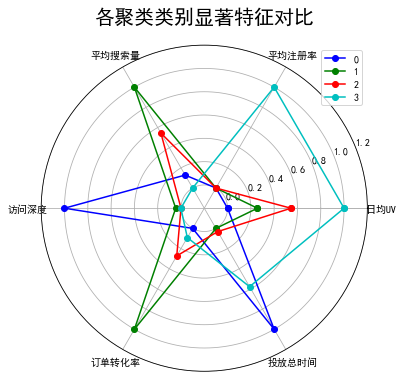

<function matplotlib.pyplot.close(*args)>

In [42]:
# part1 各类别数据预处理
num_sets = cluster_pd.iloc[:6, :].T.astype(np.float64)  # 获取要展示的数据
num_sets_max_min = model_scaler.fit_transform(num_sets)  # 获得标准化后的数据
# part2 画布基本设置
fig = plt.figure(figsize=(6,6))  # 建立画布
ax = fig.add_subplot(111, polar=True)  # 增加子网格，注意polar参数
labels = np.array(merge_data1.index)  # 设置要展示的数据标签
cor_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']  # 定义不同类别的颜色
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)  # 计算各个区间的角度
angles = np.concatenate((angles, [angles[0]]))  # 建立相同首尾字段以便于闭合
# part3 画雷达图
for i in range(len(num_sets)):  # 循环每个类别
    data_tmp = num_sets_max_min[i, :]  # 获得对应类数据
    data = np.concatenate((data_tmp, [data_tmp[0]]))  # 建立相同首尾字段以便于闭合
    ax.plot(angles, data, 'o-', c=cor_list[i], label=i)  # 画线
# part4 设置图像显示格式
ax.set_thetagrids(angles * 180 / np.pi, labels, fontproperties="SimHei")  # 设置极坐标轴
plt.rcParams['font.sans-serif'] = ['SimHei']# 用来正常显示中文标签
ax.set_rlim(-0.2, 1.2)  # 设置坐标轴尺度范围
plt.legend(loc=1)  # 设置图例位置
plt.title('各聚类类别显著特征对比',fontsize = '20',color = 'black') # 设置标题
plt.tick_params(labelsize=10,colors='black')# 设置标签
# part5 保存
plt.savefig('D:\Code\Evaluation And Optimization Strategies Of Corporate Advertising Effects\Result\广告聚类分析图.png')
plt.show()
plt.close